<a href="https://colab.research.google.com/github/MonikSense/TFT-rGO-/blob/main/TFT_Paper1_rGO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Voltage   Current  gas conc. (ppm)
0      0.0  0.000005                0
1      0.2  0.014300                0
2      0.4  0.028500                0
3      0.6  0.042500                0
4      0.8  0.056900                0
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}
Test Mean Squared Error: 0.0016
Cross-Validation RMSE scores: [0.05674917 0.03333972 0.1378786  0.22899796 0.20526615]
Mean CV RMSE: 0.1324463184242923


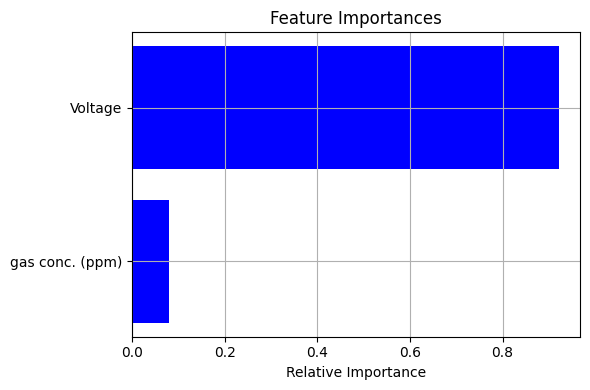

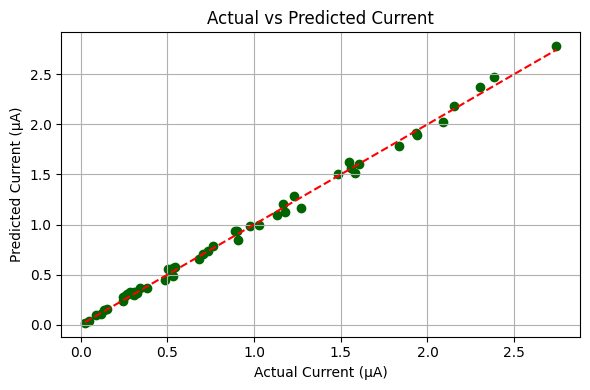

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
url = "https://raw.githubusercontent.com/MonikSense/MonikSense/refs/heads/main/TFT%20paper4%20final3.CSV"
df = pd.read_csv(url)  # Adjust delimiter if needed

# Preview data
print(df.head())

# Define features and target
X = df[['Voltage', 'gas conc. (ppm)']]  # Adjust if needed
y = df['Current']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base model
rf = RandomForestRegressor(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

# GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best estimator
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict and evaluate
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error: {mse:.4f}")

# --- Cross-validation on best model ---
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print("Cross-Validation RMSE scores:", cv_rmse)
print("Mean CV RMSE:", np.mean(cv_rmse))

# --- Feature Importance Plot ---
importances = best_rf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(6, 4))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="b", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.grid(True)
plt.show()

# --- Actual vs Predicted Plot ---
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='darkgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Current (μA)")
plt.ylabel("Predicted Current (μA)")
plt.title("Actual vs Predicted Current")
plt.grid(True)
plt.tight_layout()
plt.show()
